In [2]:
import csv
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import torch

from PIL import Image


# Data analysis on the clothing data set [downloaded from here](https://www.kaggle.com/agrigorev/clothing-dataset-full)

In [3]:
list_IDs = []
labels = {}
with open('C:/MyProjects/ML/datasets/clothing/images.csv', mode='r') as garment_dataset:
    reader = csv.reader(garment_dataset)
    next(reader) # skipping the 1st row as it has only the columns titles
    for row in reader:
        list_IDs.append(row[0])
        labels[row[0]] = row[2]
dedupped = set()
all_labels = list(labels.values())
unique_lables = [x for x in all_labels if x not in dedupped and (dedupped.add(x) or True)]

In [6]:
print(f'classes count: {len(unique_lables)}, including: {unique_lables}')

classes count: 20, including: ['Not sure', 'T-Shirt', 'Shoes', 'Shorts', 'Shirt', 'Pants', 'Skirt', 'Other', 'Top', 'Outwear', 'Dress', 'Body', 'Longsleeve', 'Undershirt', 'Hat', 'Polo', 'Blouse', 'Hoodie', 'Skip', 'Blazer']


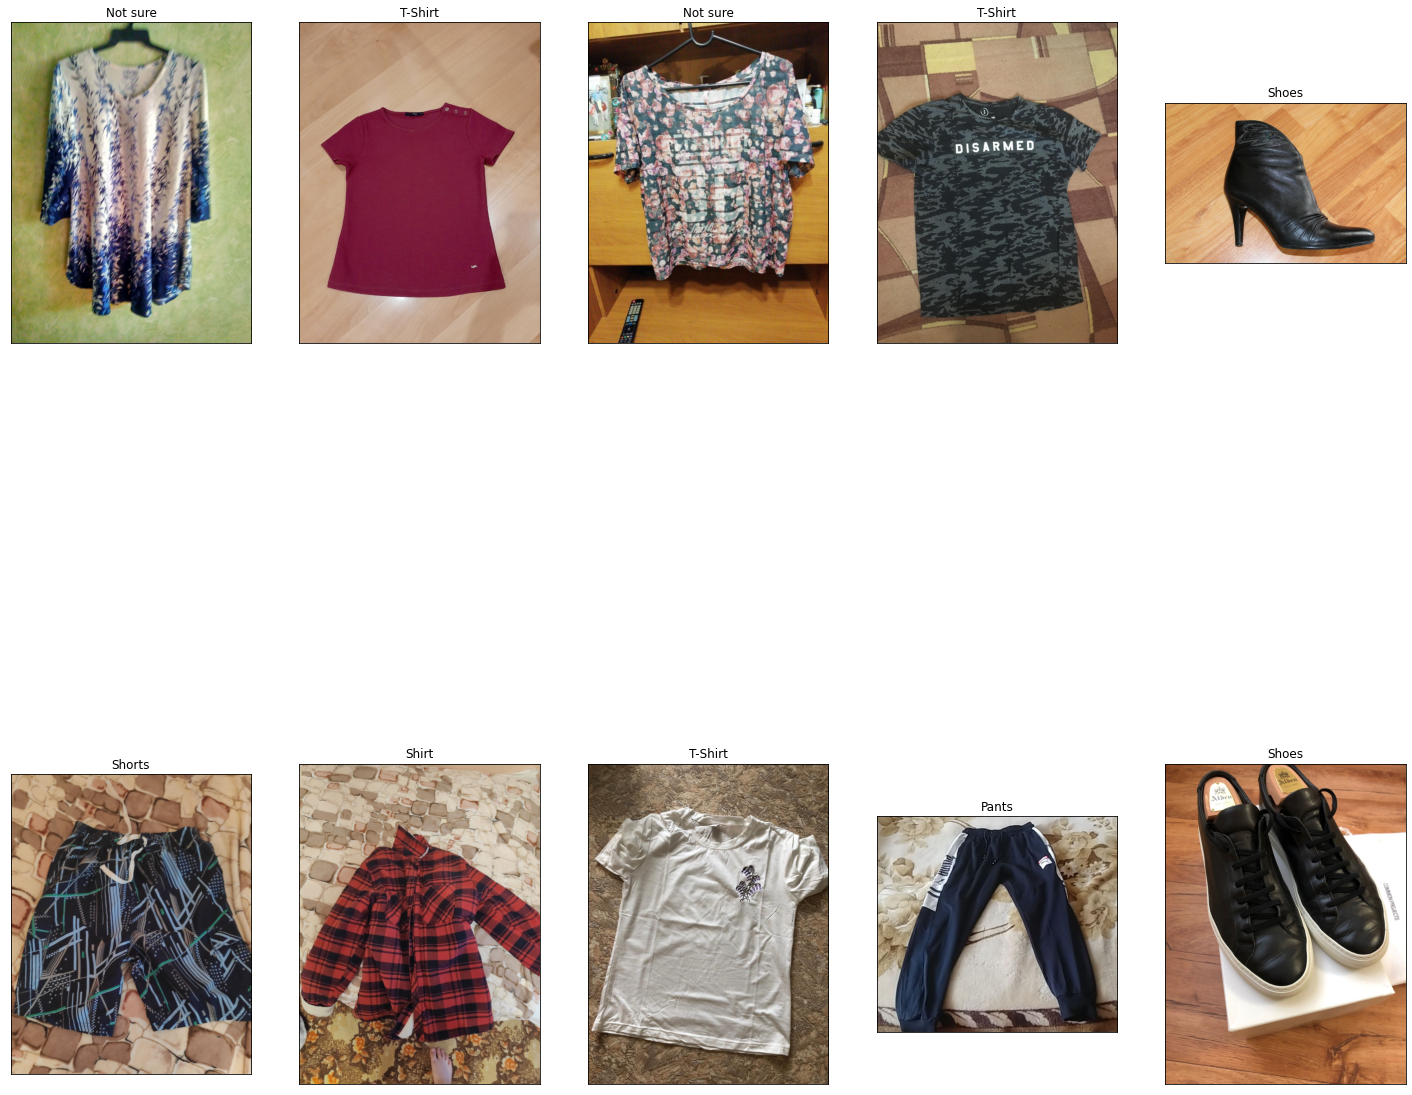

In [43]:
IMG_DIR = 'C:/MyProjects/ML/datasets/clothing/images_original/'
sample = list_IDs[:10]

images = [Image.open(f'{IMG_DIR}/{img_id}.jpg') for img_id in sample]
fig = plt.figure(figsize=(25,25),  facecolor='w')
for ind, img_id in enumerate(sample):
  plt.subplot(2, 5, ind+1)
  plt.title(labels[img_id])
  plt.imshow(images[ind], cmap='gray')
  plt.xticks([])
  plt.yticks([])


## Distribution of the lables

1. How the samples are distributed between the classes

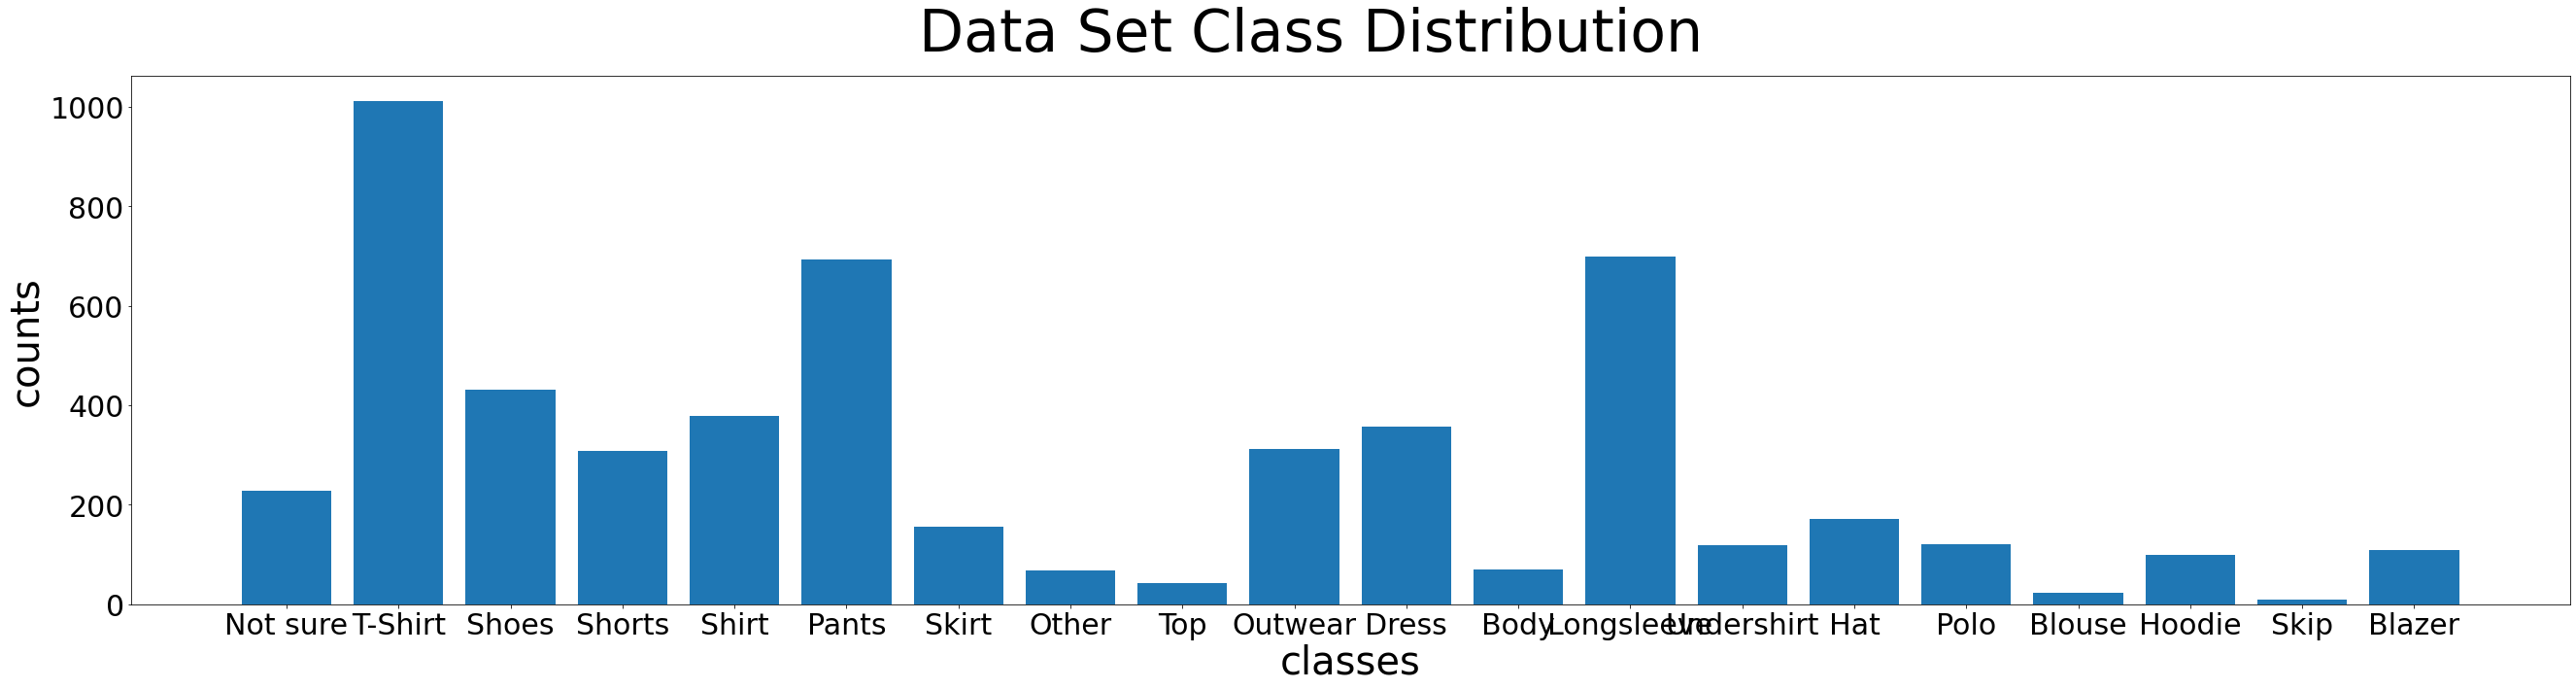

In [45]:
sample_count_per_class = {}
counters = np.zeros((1, len(unique_lables)))
all_labels = list(labels.values())
for lable in all_labels:
    counters[0, unique_lables.index(lable)] += 1

plt.figure(figsize=(45, 10), facecolor='w')
plt.suptitle('Class Distribution')
plt.bar(unique_lables, counters[0])
plt.tick_params(labelsize=30)
plt.xlabel('classes', fontsize=40)
plt.ylabel('counts', fontsize=40)
plt.show()



Although this data set is ~7.9GB, it is unbalanced, as it doesn't have same sample count per class.
This is bad because no matter how good the model is, it won't recognize 'Blouses' as much as 'T-Shirts'.
One way to compensate this is by augmenting the data samples of those classes.


## Augmenting images

* Warp 
* Blur
* add gussian noise

(2704, 3020, 3)
perspective transform: [[ 6.02064069e-01 -3.69822485e-02  1.00000000e+02]
 [-3.26649780e-01  5.78573808e-01  1.05000000e+03]
 [-1.20802433e-04 -1.22457777e-05  1.00000000e+00]]


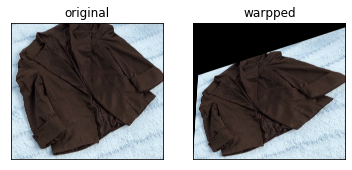

In [48]:
src_img = cv.imread(f'{IMG_DIR}/{list_IDs[510]}.jpg')

print(src_img.shape)
w, h = src_img.shape[1], src_img.shape[0]
input_pts = np.float32([[0,0],[0,h],[w,0],[w, h]])
output_pts = np.float32([[100,1050],[0,h],[w,100],[w, h]])
M = cv.getPerspectiveTransform(input_pts,output_pts)
print('perspective transform:',M)
out = cv.warpPerspective(src_img, M, (w, h),flags=cv.INTER_LINEAR)

titles = ['original', 'warpped']
fig = plt.figure(facecolor='w')
for ind, img in enumerate([src_img, out]):
  plt.subplot(1, 2, ind+1)
  plt.title(titles[ind])
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
